# COMP 432 - BIXI

### This notebook contains the steps we went through when we first collected the data

In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load BIXI data

In [2]:
zf = ZipFile('./data/bixi/biximontrealrentals2019-33ea73.zip')
bixi_2019_04 = pd.read_csv(zf.open('OD_2019-04.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_05 = pd.read_csv(zf.open('OD_2019-05.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_06 = pd.read_csv(zf.open('OD_2019-06.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_07 = pd.read_csv(zf.open('OD_2019-07.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_08 = pd.read_csv(zf.open('OD_2019-08.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_09 = pd.read_csv(zf.open('OD_2019-09.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_10 = pd.read_csv(zf.open('OD_2019-10.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_stations = pd.read_csv(zf.open('Stations_2019.csv'), dtype={'name': 'str'})

/Users/simon/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
bixi_2019_04

start_date  start_station_code            end_date  \
0      2019-04-14 07:55:22                6001 2019-04-14 08:07:16   
1      2019-04-14 07:59:31                6411 2019-04-14 08:09:18   
2      2019-04-14 07:59:55                6097 2019-04-14 08:12:11   
3      2019-04-14 07:59:57                6310 2019-04-14 08:27:58   
4      2019-04-14 08:00:37                7029 2019-04-14 08:14:12   
...                    ...                 ...                 ...   
237537 2019-04-30 23:59:27                6215 2019-05-01 00:01:57   
237538 2019-04-30 23:59:37                6173 2019-05-01 00:07:17   
237539 2019-04-30 23:59:38                6080 2019-05-01 00:10:30   
237540 2019-04-30 23:59:40                6226 2019-05-01 00:25:19   
237541 2019-04-30 23:59:45                6065 2019-05-01 00:01:05   

        end_station_code  duration_sec  is_member  
0                   6132           713          1  
1                   6411           587          1  
2                   6036           736          1  
3                   6345          1680          1  
4                   6250           814          0  
...                  ...           ...        ...  
237537              6181           150          1  
237538              6176           459          1  
237539              6719           652          1  
237540              6175          1538          1  
237541              6063            79          1  

[237542 rows x 6 columns]

In [32]:
bixi_2019_stations[(bixi_2019_stations['Code'] == 6100)]

Code                     name  latitude  longitude
97  6100  Mackay / de Maisonneuve    45.497    -73.579

# Load weather data

In [6]:
# Note: Use Date/Time column instead of Time column
weather_2019_04 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_04-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_05 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_05-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_06 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_06-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_07 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_07-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_08 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_08-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_09 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_09-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_10 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_10-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})

In [8]:
weather_2019_04

Longitude (x)  Latitude (y)     Station Name  Climate ID  \
0          -73.740        45.470  MONTREAL INTL A     7025251   
1          -73.740        45.470  MONTREAL INTL A     7025251   
2          -73.740        45.470  MONTREAL INTL A     7025251   
3          -73.740        45.470  MONTREAL INTL A     7025251   
4          -73.740        45.470  MONTREAL INTL A     7025251   
..             ...           ...              ...         ...   
715        -73.740        45.470  MONTREAL INTL A     7025251   
716        -73.740        45.470  MONTREAL INTL A     7025251   
717        -73.740        45.470  MONTREAL INTL A     7025251   
718        -73.740        45.470  MONTREAL INTL A     7025251   
719        -73.740        45.470  MONTREAL INTL A     7025251   

              Date/Time  Year  Month  Day   Time  Temp (°C)  ...  \
0   2019-04-01 00:00:00  2019      4    1  00:00     -1.500  ...   
1   2019-04-01 01:00:00  2019      4    1  01:00     -1.700  ...   
2   2019-04-01 02:00:00  2019      4    1  02:00     -2.900  ...   
3   2019-04-01 03:00:00  2019      4    1  03:00     -3.900  ...   
4   2019-04-01 04:00:00  2019      4    1  04:00     -4.800  ...   
..                  ...   ...    ...  ...    ...        ...  ...   
715 2019-04-30 19:00:00  2019      4   30  19:00     11.400  ...   
716 2019-04-30 20:00:00  2019      4   30  20:00      9.800  ...   
717 2019-04-30 21:00:00  2019      4   30  21:00      8.900  ...   
718 2019-04-30 22:00:00  2019      4   30  22:00      8.200  ...   
719 2019-04-30 23:00:00  2019      4   30  23:00      7.200  ...   

     Wind Spd Flag  Visibility (km)  Visibility Flag  Stn Press (kPa)  \
0              nan           24.100              nan          100.750   
1              nan           24.100              nan          100.790   
2              nan           24.100              nan          100.860   
3              nan           24.100              nan          100.920   
4              nan           24.100              nan          101.030   
..             ...              ...              ...              ...   
715            nan           48.300              nan          102.370   
716            nan           24.100              nan          102.480   
717            nan           24.100              nan          102.500   
718            nan           24.100              nan          102.520   
719            nan           24.100              nan          102.570   

     Stn Press Flag  Hmdx  Hmdx Flag  Wind Chill  Wind Chill Flag  \
0               nan   nan        nan      -7.000              nan   
1               nan   nan        nan      -9.000              nan   
2               nan   nan        nan      -9.000              nan   
3               nan   nan        nan     -10.000              nan   
4               nan   nan        nan     -11.000              nan   
..              ...   ...        ...         ...              ...   
715             nan   nan        nan         nan              nan   
716             nan   nan        nan         nan              nan   
717             nan   nan        nan         nan              nan   
718             nan   nan        nan         nan              nan   
719             nan   nan        nan         nan              nan   

           Weather  
0             Snow  
1           Cloudy  
2              NaN  
3              NaN  
4            Clear  
..             ...  
715  Mostly Cloudy  
716            NaN  
717            NaN  
718         Cloudy  
719            NaN  

[720 rows x 28 columns]

# Merging all data together

## BIXI data

Merging all 2019 bixi trips together

In [7]:
bixi_2019_all = pd.concat([bixi_2019_04, bixi_2019_05, bixi_2019_06, bixi_2019_07, bixi_2019_08, bixi_2019_09, bixi_2019_10])
bixi_2019_all.sample(5)

start_date start_station_code            end_date  \
750226 2019-07-22 15:06:15               6005 2019-07-22 15:36:36   
412069 2019-06-14 06:54:52               6391 2019-06-14 06:57:58   
850908 2019-06-28 13:06:41               6083 2019-06-28 13:22:19   
99986  2019-09-04 18:10:52               6065 2019-09-04 18:17:09   
53135  2019-08-02 12:39:08               7096 2019-08-02 13:08:55   

       end_station_code  duration_sec  is_member  
750226             6004          1820          1  
412069             6387           185          1  
850908             6143           937          1  
99986              6202           376          1  
53135              6228          1787          1

Append station data to all Bixi Trips

***May take a while to run**

In [8]:
bixi_2019_all_with_stations = bixi_2019_all.merge(bixi_2019_stations, left_index=True, left_on='start_station_code', right_on='Code').drop('Code', 1).rename({'name': 'start_name', 'latitude': 'start_latitude', 'longitude': 'start_longitude'}, axis=1).merge(bixi_2019_stations, left_index=True, left_on='end_station_code', right_on='Code').drop('Code', 1).rename({'name': 'end_name', 'latitude': 'end_latitude', 'longitude': 'end_longitude'}, axis=1)
bixi_2019_all_with_stations.sample(2)

start_date start_station_code            end_date  \
29  2019-06-08 12:42:58               6175 2019-06-08 12:54:41   
535 2019-06-05 16:15:44               6052 2019-06-05 16:30:33   

    end_station_code  duration_sec  is_member                start_name  \
29              6021           702          1  St-Christophe / Cherrier   
535             7070           888          1      de la Commune / King   

     start_latitude  start_longitude                          end_name  \
29           45.520          -73.568  de l'Hôtel-de-Ville / Sherbrooke   
535          45.498          -73.553                Bourgeoys / Favard   

     end_latitude  end_longitude  
29         45.515        -73.568  
535        45.480        -73.556

## Weather data

Merging weather data

In [9]:
weather_2019_all = pd.concat([weather_2019_04, weather_2019_05, weather_2019_06, weather_2019_07, weather_2019_08, weather_2019_09, weather_2019_10])
weather_2019_all.sample(5)

Longitude (x)  Latitude (y)     Station Name  Climate ID  \
79         -73.740        45.470  MONTREAL INTL A     7025251   
655        -73.740        45.470  MONTREAL INTL A     7025251   
221        -73.740        45.470  MONTREAL INTL A     7025251   
442        -73.740        45.470  MONTREAL INTL A     7025251   
541        -73.740        45.470  MONTREAL INTL A     7025251   

              Date/Time  Year  Month  Day   Time  Temp (°C)  ...  \
79  2019-10-04 07:00:00  2019     10    4  07:00      5.500  ...   
655 2019-04-28 07:00:00  2019      4   28  07:00      1.900  ...   
221 2019-04-10 05:00:00  2019      4   10  05:00     -2.900  ...   
442 2019-05-19 10:00:00  2019      5   19  10:00     12.500  ...   
541 2019-04-23 13:00:00  2019      4   23  13:00     15.900  ...   

     Wind Spd Flag  Visibility (km)  Visibility Flag  Stn Press (kPa)  \
79             nan           24.100              nan          101.590   
655            nan           24.100              nan          101.050   
221            nan           24.100              nan          100.530   
442            nan           24.100              nan          101.010   
541            nan           48.300              nan          100.800   

     Stn Press Flag  Hmdx  Hmdx Flag  Wind Chill  Wind Chill Flag  \
79              nan   nan        nan         nan              nan   
655             nan   nan        nan         nan              nan   
221             nan   nan        nan      -7.000              nan   
442             nan   nan        nan         nan              nan   
541             nan   nan        nan         nan              nan   

           Weather  
79    Mainly Clear  
655         Cloudy  
221            NaN  
442         Cloudy  
541  Mostly Cloudy  

[5 rows x 28 columns]

# Extract features from weather data

Checking for any null values in weather data to know which features to avoid

We will still keep *Weather* even with ~3000 nulls since this will answer our question

In [10]:
weather_2019_all.isnull().sum()

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
Date/Time                 0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                 1
Temp Flag              5136
Dew Point Temp (°C)       1
Dew Point Temp Flag    5136
Rel Hum (%)               1
Rel Hum Flag           5136
Wind Dir (10s deg)        5
Wind Dir Flag          5136
Wind Spd (km/h)           1
Wind Spd Flag          5136
Visibility (km)           1
Visibility Flag        5136
Stn Press (kPa)           1
Stn Press Flag         5136
Hmdx                   3988
Hmdx Flag              5136
Wind Chill             5024
Wind Chill Flag        5136
Weather                2991
dtype: int64

In [11]:
weather_2019_all = weather_2019_all[[
    'Date/Time', 
    'Year',
    'Month',
    'Day',
    'Temp (°C)', 
    'Dew Point Temp (°C)',
    'Rel Hum (%)',
    'Wind Dir (10s deg)',
    'Wind Spd (km/h)',
    'Visibility (km)', 
    'Stn Press (kPa)', 
    'Weather']]

weather_2019_all['Hour'] = weather_2019_all['Date/Time'].dt.hour
weather_2019_all['Minute'] = weather_2019_all['Date/Time'].dt.minute
weather_2019_all['Second'] = weather_2019_all['Date/Time'].dt.second
weather_2019_all['Day_of_year'] = weather_2019_all['Date/Time'].dt.dayofyear

weather_2019_all.sample(5)

Date/Time  Year  Month  Day  Temp (°C)  Dew Point Temp (°C)  \
565 2019-04-24 13:00:00  2019      4   24      5.700                4.100   
162 2019-07-07 18:00:00  2019      7    7     24.400                8.100   
256 2019-10-11 16:00:00  2019     10   11     18.700                2.500   
141 2019-10-06 21:00:00  2019     10    6     14.700               12.800   
698 2019-09-30 02:00:00  2019      9   30      4.900                2.600   

     Rel Hum (%)  Wind Dir (10s deg)  Wind Spd (km/h)  Visibility (km)  \
565       89.000              30.000           15.000           24.100   
162       35.000              22.000           14.000           48.300   
256       34.000               5.000           23.000           48.300   
141       88.000              16.000           16.000           24.100   
698       85.000               4.000           13.000           24.100   

     Stn Press (kPa) Weather  Hour  Minute  Second  Day_of_year  
565          100.320  Cloudy    13       0       0          114  
162          101.040     NaN    18       0       0          188  
256          101.920   Clear    16       0       0          284  
141          101.200     NaN    21       0       0          279  
698          102.610     NaN     2       0       0          273

## Checking possible values for weather

Weather data is a string that may contain more than 1 weather condition. We will one-hot encode it.

In [12]:
weather_2019_all['Weather'].value_counts()

Mostly Cloudy                              520
Clear                                      334
Cloudy                                     326
Mainly Clear                               317
Rain                                       310
Rain Showers                                87
Rain,Fog                                    83
Drizzle,Fog                                 32
Fog                                         29
Drizzle                                     25
Snow                                        17
Moderate Rain,Fog                           16
Thunderstorms,Rain Showers                  10
Moderate Rain                                6
Freezing Rain                                4
Snow Showers                                 3
Freezing Rain,Fog                            3
Freezing Drizzle,Fog                         3
Freezing Drizzle,Snow                        2
Rain,Snow                                    2
Thunderstorms,Moderate Rain Showers          2
Moderate Rain

### Hot encode

In [13]:
hot_encode = weather_2019_all['Weather'].str.get_dummies(',')
hot_encode.head(5)

Clear  Cloudy  Drizzle  Fog  Freezing Drizzle  Freezing Rain  \
0      0       0        0    0                 0              0   
1      0       1        0    0                 0              0   
2      0       0        0    0                 0              0   
3      0       0        0    0                 0              0   
4      1       0        0    0                 0              0   

   Heavy Rain Showers  Mainly Clear  Moderate Rain  Moderate Rain Showers  \
0                   0             0              0                      0   
1                   0             0              0                      0   
2                   0             0              0                      0   
3                   0             0              0                      0   
4                   0             0              0                      0   

   Moderate Snow  Mostly Cloudy  Rain  Rain Showers  Snow  Snow Grains  \
0              0              0     0             0     1            0   
1              0              0     0             0     0            0   
2              0              0     0             0     0            0   
3              0              0     0             0     0            0   
4              0              0     0             0     0            0   

   Snow Showers  Thunderstorms  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

Visually verify that it matches with weather

In [14]:
weather_2019_all[['Weather']].head(5)

Weather
0    Snow
1  Cloudy
2     NaN
3     NaN
4   Clear

### Merge hot encode with weather data

In [15]:
weather_2019_all = pd.concat([weather_2019_all, hot_encode], axis=1, sort=False).drop('Weather', axis=1)
weather_2019_all

Date/Time  Year  Month  Day  Temp (°C)  Dew Point Temp (°C)  \
0   2019-04-01 00:00:00  2019      4    1     -1.500               -4.000   
1   2019-04-01 01:00:00  2019      4    1     -1.700               -6.800   
2   2019-04-01 02:00:00  2019      4    1     -2.900               -7.700   
3   2019-04-01 03:00:00  2019      4    1     -3.900               -9.300   
4   2019-04-01 04:00:00  2019      4    1     -4.800              -10.600   
..                  ...   ...    ...  ...        ...                  ...   
739 2019-10-31 19:00:00  2019     10   31     11.900               11.400   
740 2019-10-31 20:00:00  2019     10   31     10.800               10.200   
741 2019-10-31 21:00:00  2019     10   31      9.900                9.200   
742 2019-10-31 22:00:00  2019     10   31      9.000                8.000   
743 2019-10-31 23:00:00  2019     10   31      8.700                7.700   

     Rel Hum (%)  Wind Dir (10s deg)  Wind Spd (km/h)  Visibility (km)  ...  \
0         83.000              30.000           19.000           24.100  ...   
1         68.000              29.000           30.000           24.100  ...   
2         70.000              29.000           21.000           24.100  ...   
3         66.000              29.000           21.000           24.100  ...   
4         64.000              28.000           21.000           24.100  ...   
..           ...                 ...              ...              ...  ...   
739       97.000               2.000           25.000            4.000  ...   
740       96.000               3.000           25.000            8.100  ...   
741       95.000               1.000           37.000           12.900  ...   
742       93.000               4.000           33.000           24.100  ...   
743       94.000               5.000           28.000           24.100  ...   

     Moderate Rain  Moderate Rain Showers  Moderate Snow  Mostly Cloudy  Rain  \
0                0                      0              0              0     0   
1                0                      0              0              0     0   
2                0                      0              0              0     0   
3                0                      0              0              0     0   
4                0                      0              0              0     0   
..             ...                    ...            ...            ...   ...   
739              1                      0              0              0     0   
740              0                      0              0              0     1   
741              1                      0              0              0     0   
742              0                      0              0              0     1   
743              0                      0              0              0     1   

     Rain Showers  Snow  Snow Grains  Snow Showers  Thunderstorms  
0               0     1            0             0              0  
1               0     0            0             0              0  
2               0     0            0             0              0  
3               0     0            0             0              0  
4               0     0            0             0              0  
..            ...   ...          ...           ...            ...  
739             0     0            0             0              0  
740             0     0            0             0              0  
741             0     0            0             0              0  
742             0     0            0             0              0  
743             0     0            0             0              0  

[5136 rows x 33 columns]

## Dealing with null values

For the missing values, we will use replace them with the last value that was observed

In [16]:
weather_2019_all.isnull().sum()

Date/Time                0
Year                     0
Month                    0
Day                      0
Temp (°C)                1
Dew Point Temp (°C)      1
Rel Hum (%)              1
Wind Dir (10s deg)       5
Wind Spd (km/h)          1
Visibility (km)          1
Stn Press (kPa)          1
Hour                     0
Minute                   0
Second                   0
Day_of_year              0
Clear                    0
Cloudy                   0
Drizzle                  0
Fog                      0
Freezing Drizzle         0
Freezing Rain            0
Heavy Rain Showers       0
Mainly Clear             0
Moderate Rain            0
Moderate Rain Showers    0
Moderate Snow            0
Mostly Cloudy            0
Rain                     0
Rain Showers             0
Snow                     0
Snow Grains              0
Snow Showers             0
Thunderstorms            0
dtype: int64

In [17]:
weather_2019_all = weather_2019_all.fillna(method='ffill') 
weather_2019_all.isnull().sum()

Date/Time                0
Year                     0
Month                    0
Day                      0
Temp (°C)                0
Dew Point Temp (°C)      0
Rel Hum (%)              0
Wind Dir (10s deg)       0
Wind Spd (km/h)          0
Visibility (km)          0
Stn Press (kPa)          0
Hour                     0
Minute                   0
Second                   0
Day_of_year              0
Clear                    0
Cloudy                   0
Drizzle                  0
Fog                      0
Freezing Drizzle         0
Freezing Rain            0
Heavy Rain Showers       0
Mainly Clear             0
Moderate Rain            0
Moderate Rain Showers    0
Moderate Snow            0
Mostly Cloudy            0
Rain                     0
Rain Showers             0
Snow                     0
Snow Grains              0
Snow Showers             0
Thunderstorms            0
dtype: int64

# Summing the number of trips per hour for every station

## Group data by stations

In [18]:
temp = bixi_2019_all_with_stations
station_group = temp.groupby('start_station_code')

## Count the number of trips by merging the hours together for each station

In [19]:
hour_trips_dict = {}

with tqdm(total=len(station_group)) as pbar:
    for station_code, df in station_group:
        # Randomly appending "start_year" since all columns return the same number. Renaming it after.
        hour_trips = pd.DataFrame(df.set_index('start_date').resample('H').count()['start_name']).rename(columns={'start_name': 'hour_trip_count'})
        hour_trips_dict[station_code] = hour_trips
        pbar.update(1)

100%|██████████| 619/619 [00:07<00:00, 79.56it/s] 


Check for station ID 4000

In [20]:
hour_trips_dict[4000].head(20)

hour_trip_count
start_date                          
2019-04-14 09:00:00                1
2019-04-14 10:00:00                4
2019-04-14 11:00:00                0
2019-04-14 12:00:00                1
2019-04-14 13:00:00                2
2019-04-14 14:00:00                3
2019-04-14 15:00:00                3
2019-04-14 16:00:00                5
2019-04-14 17:00:00                0
2019-04-14 18:00:00                0
2019-04-14 19:00:00                0
2019-04-14 20:00:00                1
2019-04-14 21:00:00                0
2019-04-14 22:00:00                0
2019-04-14 23:00:00                0
2019-04-15 00:00:00                0
2019-04-15 01:00:00                0
2019-04-15 02:00:00                0
2019-04-15 03:00:00                0
2019-04-15 04:00:00                1

# Merge weather data to trip data

In [21]:
for i in hour_trips_dict:
    df = hour_trips_dict[i]
    df = df.merge(weather_2019_all, left_on='start_date', right_on='Date/Time')
    hour_trips_dict[i] = df

In [22]:
hour_trips_dict[4000]

hour_trip_count           Date/Time  Year  Month  Day  Temp (°C)  \
0                   1 2019-04-14 09:00:00  2019      4   14      7.000   
1                   4 2019-04-14 10:00:00  2019      4   14      7.400   
2                   0 2019-04-14 11:00:00  2019      4   14      7.600   
3                   1 2019-04-14 12:00:00  2019      4   14      8.300   
4                   2 2019-04-14 13:00:00  2019      4   14      7.800   
...               ...                 ...   ...    ...  ...        ...   
4805                0 2019-10-31 14:00:00  2019     10   31     13.300   
4806                1 2019-10-31 15:00:00  2019     10   31     15.500   
4807                0 2019-10-31 16:00:00  2019     10   31     15.600   
4808                1 2019-10-31 17:00:00  2019     10   31     15.900   
4809                1 2019-10-31 18:00:00  2019     10   31     13.400   

      Dew Point Temp (°C)  Rel Hum (%)  Wind Dir (10s deg)  Wind Spd (km/h)  \
0                  -3.700       46.000              27.000           12.000   
1                  -4.400       43.000              25.000            7.000   
2                  -4.300       43.000              28.000            8.000   
3                  -2.500       46.000              19.000           12.000   
4                  -4.300       42.000              22.000            4.000   
...                   ...          ...                 ...              ...   
4805               12.700       96.000               2.000            8.000   
4806               14.900       97.000              13.000           13.000   
4807               15.000       96.000              12.000            8.000   
4808               15.200       96.000               9.000            7.000   
4809               12.800       96.000               2.000           15.000   

      ...  Moderate Rain  Moderate Rain Showers  Moderate Snow  Mostly Cloudy  \
0     ...              0                      0              0              0   
1     ...              0                      0              0              0   
2     ...              0                      0              0              0   
3     ...              0                      0              0              0   
4     ...              0                      0              0              0   
...   ...            ...                    ...            ...            ...   
4805  ...              0                      0              0              0   
4806  ...              0                      0              0              0   
4807  ...              1                      0              0              0   
4808  ...              0                      0              0              0   
4809  ...              1                      0              0              0   

      Rain  Rain Showers  Snow  Snow Grains  Snow Showers  Thunderstorms  
0        0             0     0            0             0              0  
1        0             0     0            0             0              0  
2        0             0     0            0             0              0  
3        0             0     0            0             0              0  
4        0             0     0            0             0              0  
...    ...           ...   ...          ...           ...            ...  
4805     1             0     0            0             0              0  
4806     1             0     0            0             0              0  
4807     0             0     0            0             0              0  
4808     1             0     0            0             0              0  
4809     0             0     0            0             0              0  

[4810 rows x 34 columns]

# Preparing data for training

In [23]:
hour_trips_dict[4000].dtypes

hour_trip_count                   int64
Date/Time                datetime64[ns]
Year                              int64
Month                             int64
Day                               int64
Temp (°C)                       float64
Dew Point Temp (°C)             float64
Rel Hum (%)                     float64
Wind Dir (10s deg)              float64
Wind Spd (km/h)                 float64
Visibility (km)                 float64
Stn Press (kPa)                 float64
Hour                              int64
Minute                            int64
Second                            int64
Day_of_year                       int64
Clear                             int64
Cloudy                            int64
Drizzle                           int64
Fog                               int64
Freezing Drizzle                  int64
Freezing Rain                     int64
Heavy Rain Showers                int64
Mainly Clear                      int64
Moderate Rain                     int64


# Checking correlation

In [24]:
correlations = [hour_trips_dict[i].corr() for i in hour_trips_dict]

In [25]:
corr_avg = correlations[7]

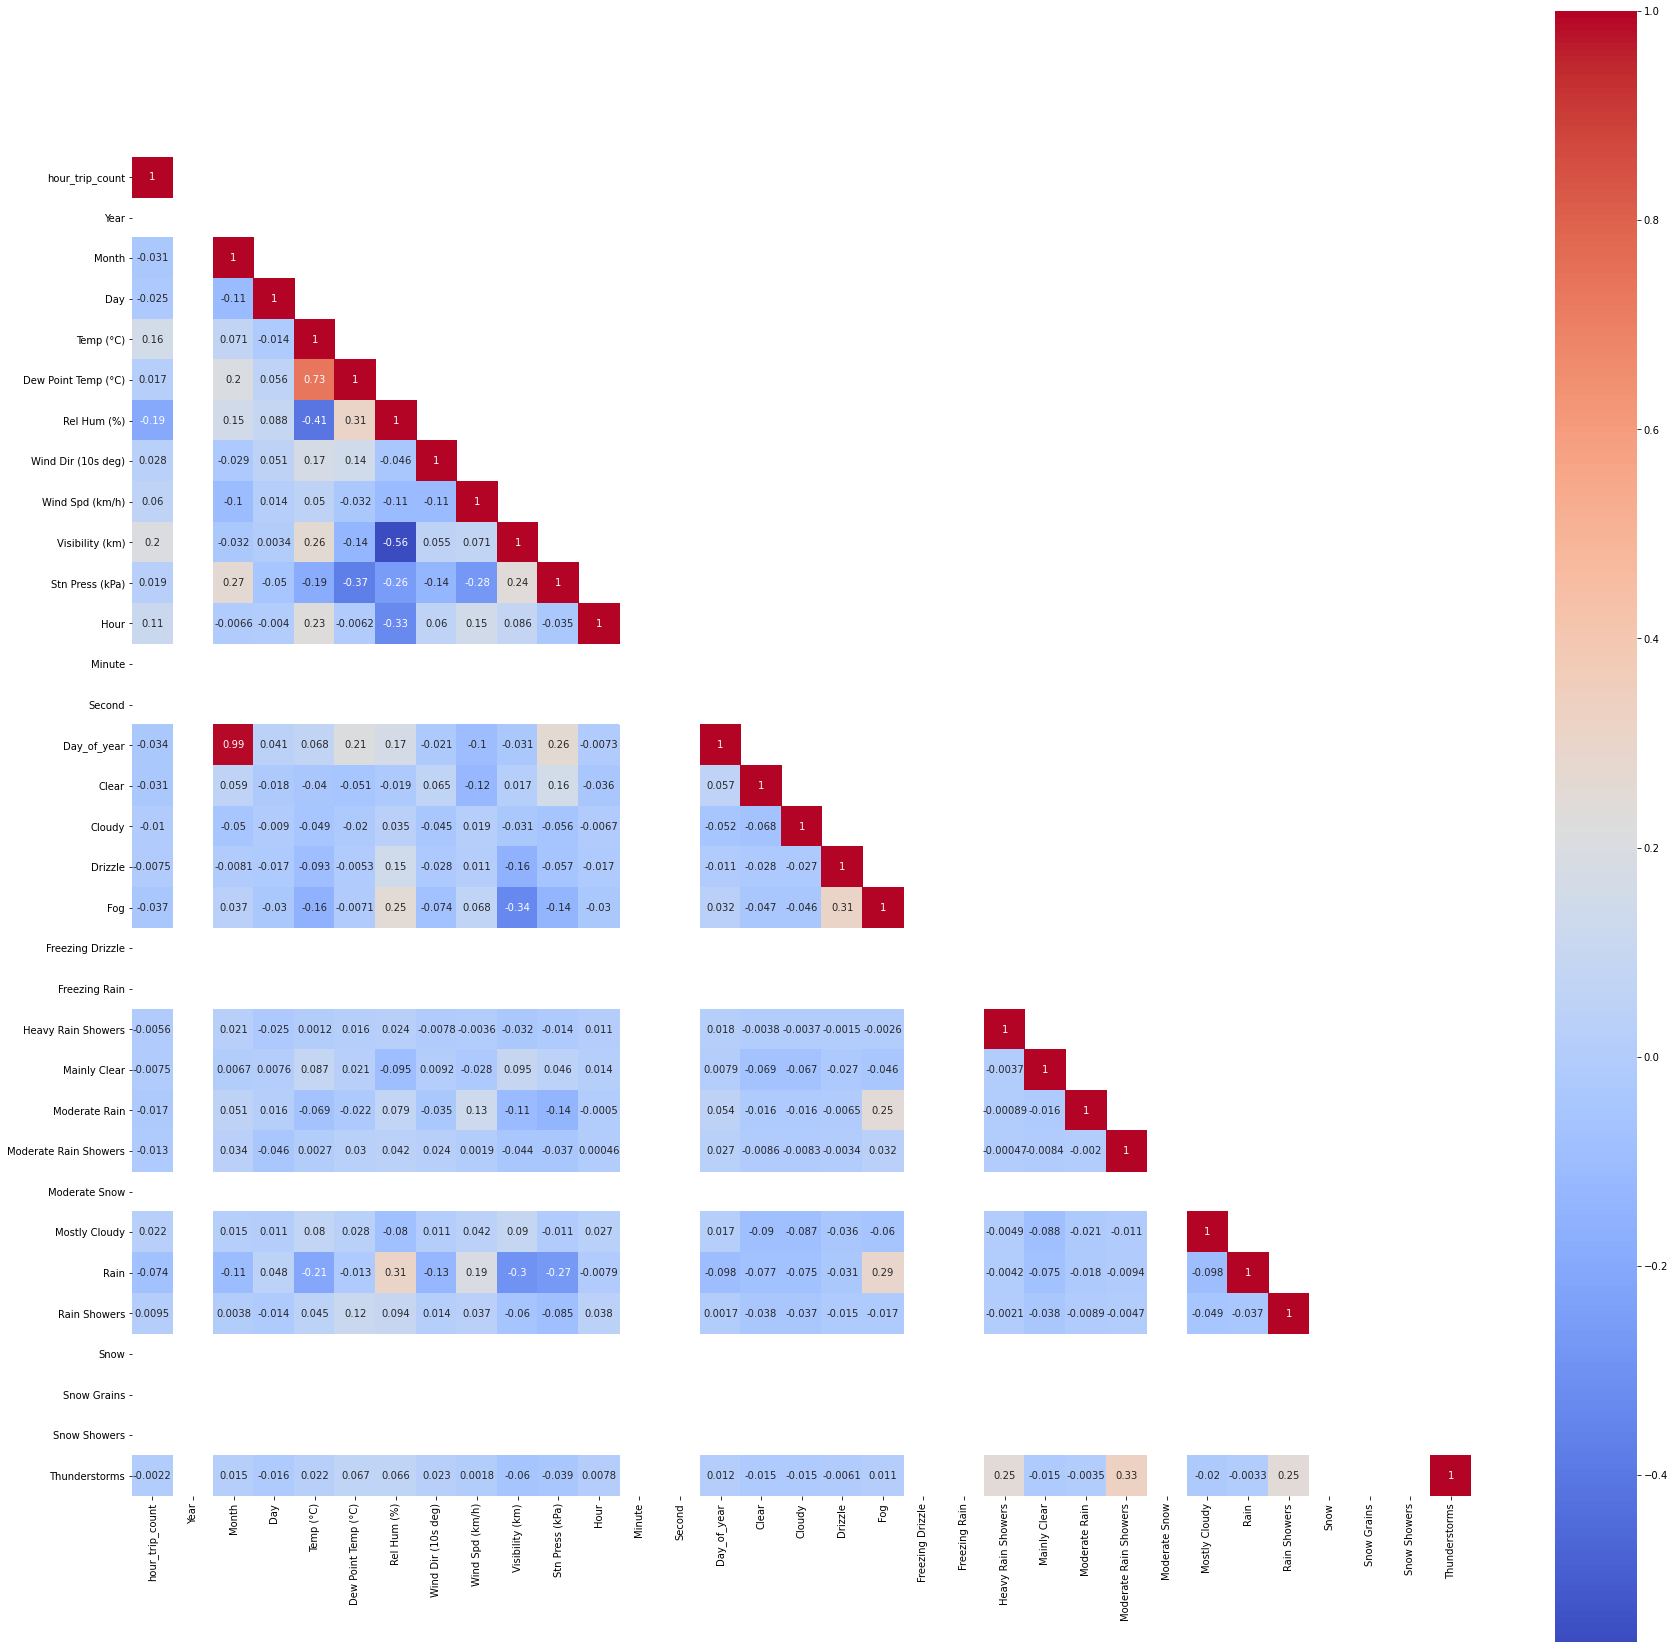

In [26]:
mask = np.array(corr_avg)
mask[np.tril_indices_from(mask)] = False # Set the lower triangle values to false. Used for masking the top half

plt.figure(figsize=(30,30))
sns.heatmap(corr_avg, mask=mask, square=True, annot=True, cmap="coolwarm")
plt.show()